#### Importing required libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulating Date & Time formats
from datetime import datetime

### Importing the datasets to individual dataframes & data exploration

Pre-processing each dataframe separately ensures tailored cleaning steps, addressing dataset-specific challenges. It allows for specific handling of missing values and duplicates, and facilitates a clearer understanding of individual data characteristics.

#### 1. Customers dataset

This dataset has information about the customer and its location. Each order is assigned to a unique customer_id. This means that the same customer will get different ids for different orders. The purpose of having a customer_unique_id on the dataset is to allow identification customers that made repurchases at the store.

In [2]:
customers = pd.read_csv("C:\\...\Brazilian eCommerce\olist_customers_dataset.csv")

In [3]:
customers.shape

(99441, 5)

the dataset has 99441 rows & 5 columns

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
customers.duplicated().sum()

0

In [8]:
customers.nunique(axis=0)

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

there are 96,096 unique customers

In [9]:
customers.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [10]:
customers.customer_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

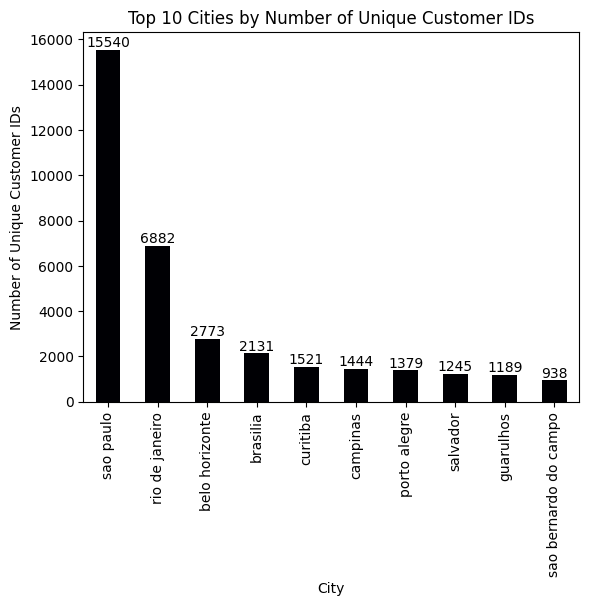

In [11]:
top_cities = customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False).head(10)

# Plotting the bar chart for top 10 values
top_cities.plot(kind = 'bar', colormap = 'magma')
plt.title('Top 10 Cities by Number of Unique Customer IDs')
plt.xlabel('City')
plt.ylabel('Number of Unique Customer IDs')

# Display the numeric data values on top of the bars
for index, value in enumerate(top_cities):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Sau Paulo (city) had the most number of unique customers.

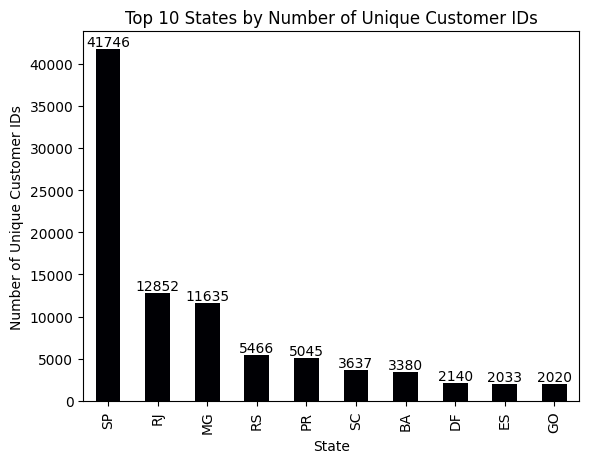

In [12]:
top_states = customers.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False).head(10)

top_states.plot(kind = 'bar', colormap = 'magma')
plt.title('Top 10 States by Number of Unique Customer IDs')
plt.xlabel('State')
plt.ylabel('Number of Unique Customer IDs')

for index, value in enumerate(top_states):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

SP had the most number of unique customers.

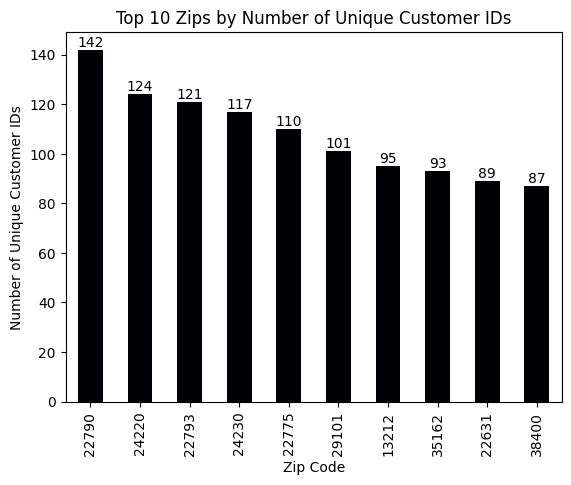

In [13]:
top_zip = customers.groupby('customer_zip_code_prefix')['customer_id'].nunique().sort_values(ascending=False).head(10)

top_zip.plot(kind = 'bar', colormap = 'magma')
plt.title('Top 10 Zips by Number of Unique Customer IDs')
plt.xlabel('Zip Code')
plt.ylabel('Number of Unique Customer IDs')

for index, value in enumerate(top_zip):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Products were delivered most frequently to zip code 22790

In [14]:
# Group data by customer_unique_id
customers.groupby('customer_unique_id').agg(unique_orders=('customer_id', 'nunique'), unique_customers=('customer_unique_id', 'nunique')).reset_index().sort_values(by='unique_orders', ascending=False).head(5)

,customer_unique_id,unique_orders,unique_customers
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17,1
23472,3e43e6105506432c953e165fb2acf44c,9,1
37797,6469f99c1f9dfae7733b25662e7f1782,7,1
76082,ca77025e7201e3b30c44b472ff346268,7,1
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7,1


Customer '8d50f5eadf50201ccdcedfb9e2ac8455' has the highest count of unique orders.

#### 2. Geolocation dataset

This dataset has information Brazilian zip codes and its latitude-longitude coordinates.

In [15]:
geolocation = pd.read_csv("C:\\...\Brazillian eCommerce\olist_geolocation_dataset.csv")

In [16]:
geolocation.shape

(1000163, 5)

the dataset has 1000163 rows & 5 columns

In [17]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [19]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [20]:
geolocation.nunique(axis=0)

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

Geolocation dataset has 8011 cities across 27 states.

#### 3. Ordered Items dataset

This dataset includes data about the items purchased within each order.

In [21]:
orderitems = pd.read_csv("C:\\...\Brazillian eCommerce\olist_order_items_dataset.csv")

In [22]:
orderitems.shape

(112650, 7)

the dataset has 112650 rows & 7 columns

In [23]:
orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
orderitems.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [26]:
orderitems.duplicated().sum()

0

In [27]:
orderitems.nunique(axis=0)

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [28]:
# to change format of date & time in required column
orderitems['shipping_limit_date'] = pd.to_datetime(orderitems['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

##### According to dataset description provided, we need to calculate the following:

In [29]:
# Total value of items for each order, calculated by multiplying the item price by the number of items in the order.
orderitems['total_order_item_value'] = orderitems['price'] * orderitems['order_item_id']

# Total freight value for each order, calculated by multiplying the freight value by the number of items in the order.
orderitems['total_freight_value'] = orderitems['freight_value'] * orderitems['order_item_id']

In [30]:
# Total order value for each order, including both the product value and the freight value for each order item.
orderitems['total_order_value'] = orderitems['total_order_item_value'] + orderitems['total_freight_value']

In [31]:
orderitems['total_order_value'].describe()

count    112650.000000
mean        160.304175
std         228.532489
min           6.080000
25%          61.070000
50%         103.550000
75%         175.870000
max       13664.080000
Name: total_order_value, dtype: float64

the average order value was 160.3

To check distribution of total order value:-

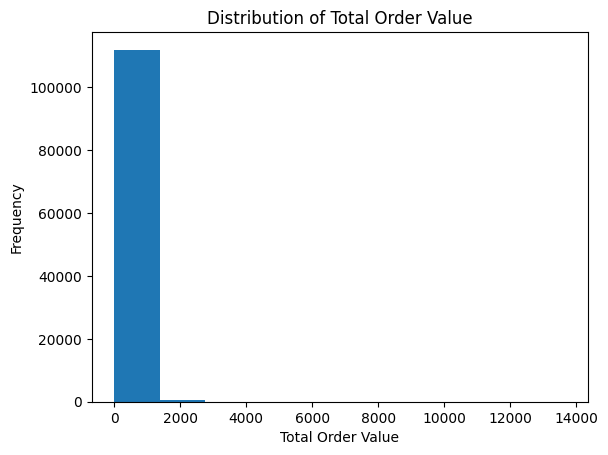

In [32]:
plt.hist(orderitems['total_order_value'])
plt.xlabel('Total Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Total Order Value')
plt.show()

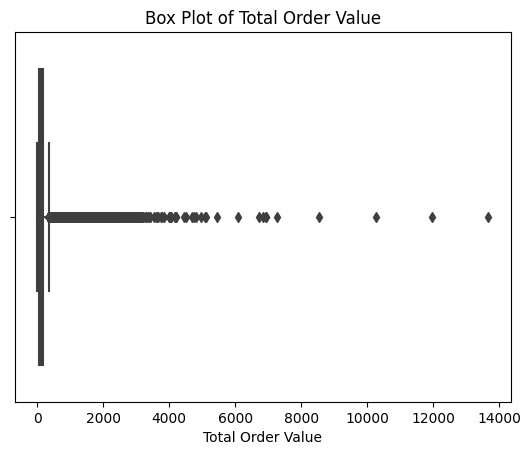

In [33]:
sns.boxplot(x = orderitems['total_order_value'])
plt.xlabel('Total Order Value')
plt.title('Box Plot of Total Order Value')
plt.show()

#### 4. Order Payments dataset

This dataset includes data about the orders payment options.

In [34]:
orderpay = pd.read_csv("C:\\...\Brazillian eCommerce\olist_order_payments_dataset.csv")

In [35]:
orderpay.shape

(103886, 5)

the dataset has 103886 rows & 5 columns

In [36]:
orderpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [37]:
orderpay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [38]:
orderpay.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [39]:
orderpay.duplicated().sum()

0

In [40]:
orderpay.nunique(axis=0)

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

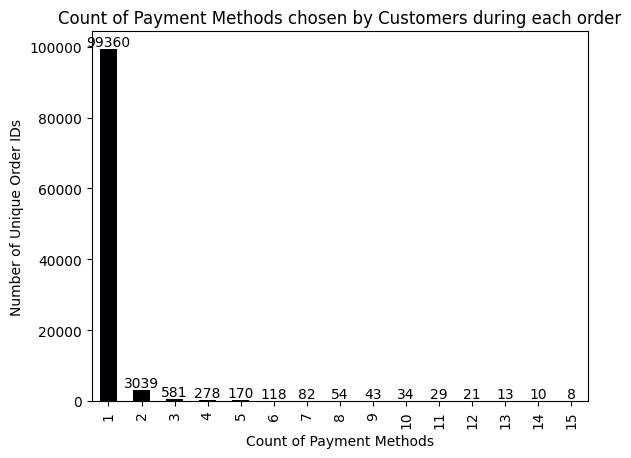

In [41]:
payseq = orderpay.groupby('payment_sequential')['order_id'].nunique().sort_values(ascending=False).head(15)

payseq.plot(kind = 'bar', colormap = 'magma')
plt.title('Count of Payment Methods chosen by Customers during each order')
plt.xlabel('Count of Payment Methods')
plt.ylabel('Number of Unique Order IDs')

for index, value in enumerate(payseq):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

majority of the customers chose a single payment method during each order.

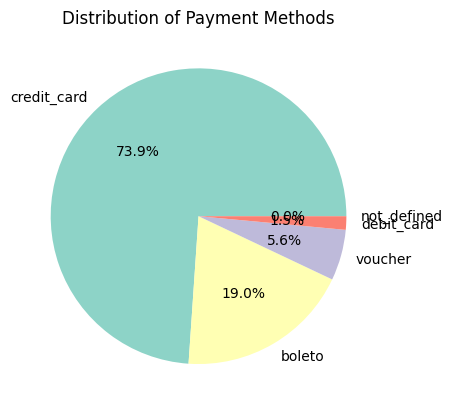

In [42]:
paytype_count = orderpay['payment_type'].value_counts()

# Plotting the pie chart
plt.pie(paytype_count, labels=paytype_count.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Payment Methods')
plt.show()

Credit Cards were a preferred method of payment for majority of orders.

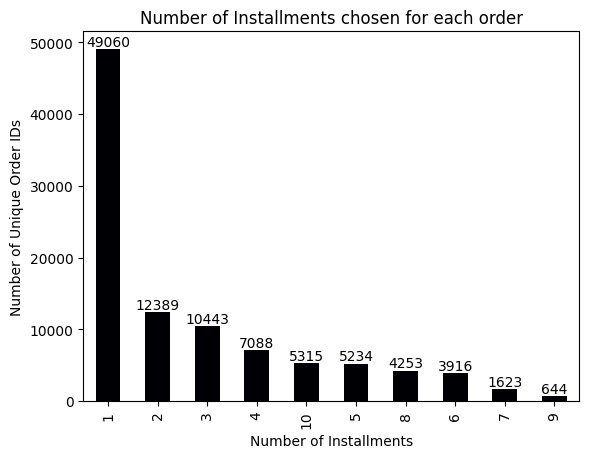

In [43]:
payinstallment = orderpay.groupby('payment_installments')['order_id'].nunique().sort_values(ascending=False).head(10)

payinstallment.plot(kind = 'bar', colormap = 'magma')
plt.title('Number of Installments chosen for each order')
plt.xlabel('Number of Installments')
plt.ylabel('Number of Unique Order IDs')

for index, value in enumerate(payinstallment):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

majority of customers preferred single payment for each order.

#### 5. Order Reviews dataset

This dataset includes data about the reviews made by the customers. After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

In [44]:
orderreview = pd.read_csv("C:\\...\Brazillian eCommerce\olist_order_reviews_dataset.csv")

In [45]:
orderreview.shape

(99224, 7)

the dataset has 99224 rows & 7 columns

In [46]:
orderreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [47]:
orderreview.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [48]:
orderreview.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [49]:
orderreview.duplicated().sum()

0

In [50]:
orderreview.nunique(axis=0)

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

from the unique number of Order IDs and Review IDs, it can be summarised that customers chose not to submit a review for 263 unique purchases.

In [51]:
orderreview['review_creation_date'] = pd.to_datetime(orderreview['review_creation_date'], format='%Y-%m-%d %H:%M:%S')
orderreview['review_answer_timestamp'] = pd.to_datetime(orderreview['review_answer_timestamp'], format='%Y-%m-%d %H:%M:%S')

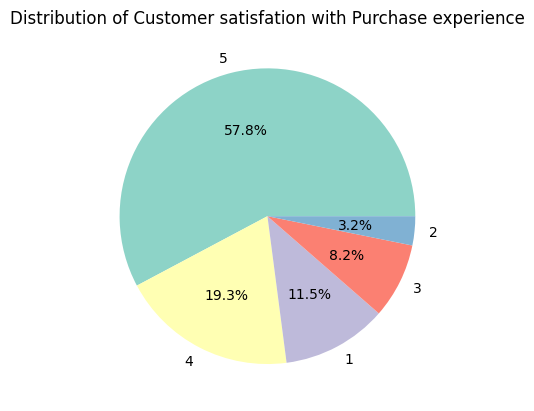

In [52]:
reviewscore = orderreview['review_score'].value_counts()

# Plotting the pie chart
plt.pie(reviewscore, labels=reviewscore.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Customer satisfation with Purchase experience')
plt.show()

majority of customers were satisfied with the purchase experience, but a significant portion (11.5%) were dissatisfied.

#### 6. Orders dataset

This is the core dataset containing information about every unique order.

In [53]:
orders = pd.read_csv("C:\\...\Brazillian eCommerce\olist_orders_dataset.csv")

In [54]:
orders.shape

(99441, 8)

the dataset has 99441 rows and 8 columns

In [55]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [56]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [57]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [58]:
orders.nunique(axis=0)

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [59]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

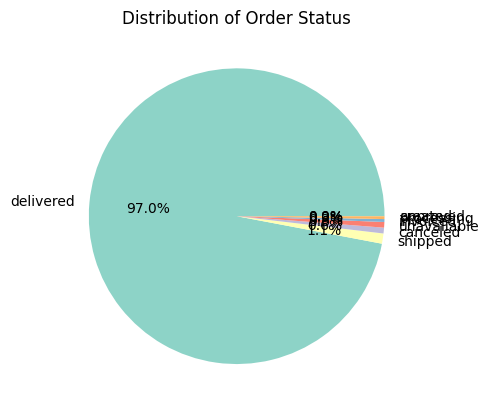

In [60]:
orderstatus = orders['order_status'].value_counts()

plt.pie(orderstatus, labels=orderstatus.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Order Status')
plt.show()

97% of orders had already been delivered, while 1.1% was being shipped.

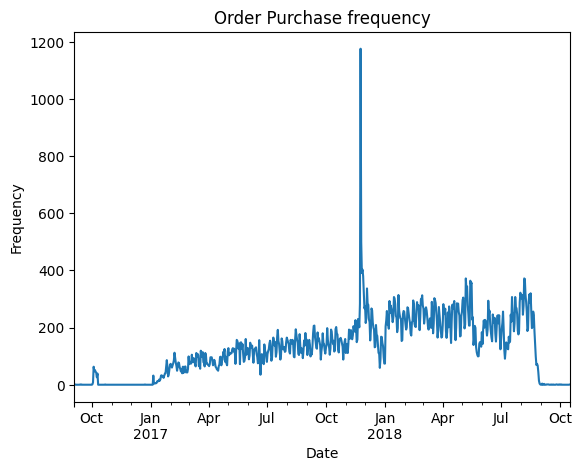

In [61]:
purchase = orders.resample('D', on='order_purchase_timestamp').size()

purchase.plot(kind='line', linestyle='-')
plt.title('Order Purchase frequency')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

Purchases peaked during mid-November to mid-December of 2017.

#### 7. Products dataset

This dataset includes data about the products sold.

In [62]:
products = pd.read_csv("C:\\...\Brazillian eCommerce\olist_products_dataset.csv")

In [63]:
products.shape

(32951, 9)

the dataset has 32951 rows & 9 columns

In [64]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [65]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


###### Product Category Names Translation dataset

In [66]:
productnames_eng = pd.read_csv("C:\\...\Brazillian eCommerce\product_category_name_translation.csv")

In [67]:
products = pd.merge(products, productnames_eng, on='product_category_name', how = 'outer')

In [68]:
products.isnull().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [69]:
# Products with null Product Category Names are assigned as "uncategorized"
products['product_category_name'].fillna("uncategorized", inplace=True)
products['product_category_name_english'].fillna("uncategorized", inplace=True)

In [70]:
products.duplicated().sum()

0

In [71]:
products.nunique(axis=0)

product_id                       32951
product_category_name               74
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
product_category_name_english       72
dtype: int64

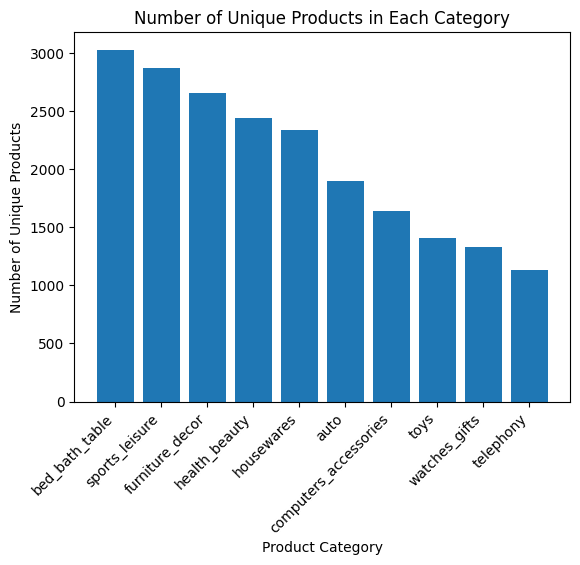

In [72]:
product_counts = products.groupby('product_category_name_english')['product_id'].nunique().sort_values(ascending=False).reset_index().head(10)

plt.bar(product_counts['product_category_name_english'], product_counts['product_id'])
plt.xlabel('Product Category')
plt.ylabel('Number of Unique Products')
plt.title('Number of Unique Products in Each Category')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 8. Sellers dataset

This dataset includes data about the sellers that fulfilled orders made.

In [73]:
sellers = pd.read_csv("C:\\...\Brazillian eCommerce\olist_sellers_dataset.csv")

In [74]:
sellers.shape

(3095, 4)

the dataset has 3095 rows & 4 columns

In [75]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [76]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [77]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [78]:
sellers.duplicated().sum()

0

In [79]:
sellers.nunique(axis=0)

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

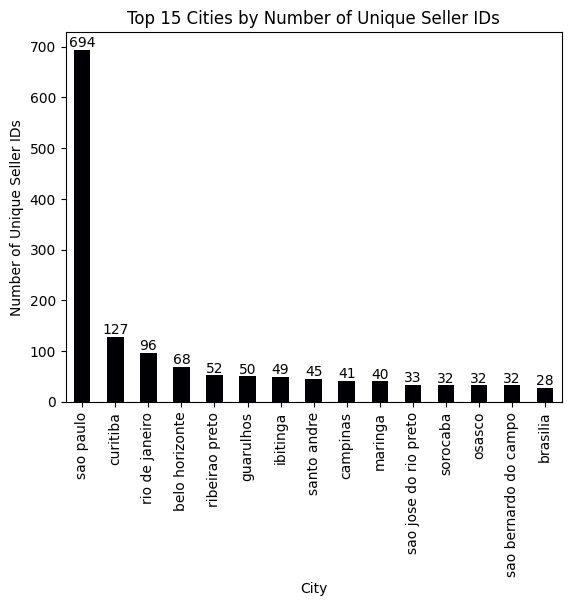

In [80]:
sellercity = sellers.groupby('seller_city')['seller_id'].nunique().sort_values(ascending=False).head(15)

# Plotting the bar chart for top 10 values
sellercity.plot(kind = 'bar', colormap = 'magma')
plt.title('Top 15 Cities by Number of Unique Seller IDs')
plt.xlabel('City')
plt.ylabel('Number of Unique Seller IDs')

# Display the numeric data values on top of the bars
for index, value in enumerate(sellercity):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Sau Paulo (city) had the most number of unique sellers.

In [81]:
# Exporting the dataframes to individual CSVs

customers.to_csv("C:\\...\Brazillian eCommerce\Datasets\customers.csv", index=False)

geolocation.to_csv("C:\\...\Brazillian eCommerce\Datasets\geolocation.csv", index=False)

orderitems.to_csv("C:\\...\Brazillian eCommerce\Datasets\orderitems.csv", index=False)

orderpay.to_csv("C:\\...\Brazillian eCommerce\Datasets\orderpay.csv", index=False)

orderreview.to_csv("C:\\...\Brazillian eCommerce\Datasets\orderreview.csv", index=False)

orders.to_csv("C:\\...\Brazillian eCommerce\Datasets\orders.csv", index=False)

products.to_csv("C:\\...\Brazillian eCommerce\Datasets\products.csv", index=False)

sellers.to_csv("C:\\...\Brazillian eCommerce\Datasets\sellers.csv", index=False)

### Exploring the correlation between variables

Merging dataframes using keys provided in dataset descriptions help combine information from different sources based on shared columns, facilitating a comprehensive understanding of relationships and patterns within the data. This process enhances data exploration and enables more informed insights during analysis.

###### Merging the dataframes

In [82]:
data = customers.copy()

In [83]:
data = pd.merge(data, orders, on='customer_id')

In [84]:
data = pd.merge(data, orderitems, on='order_id')

In [85]:
data = pd.merge(data, orderpay, on='order_id')

In [86]:
data = pd.merge(data, orderreview, on='order_id')

In [87]:
data = pd.merge(data, products, on='product_id')

In [88]:
data = pd.merge(data, sellers, on='seller_id')

In [89]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP


In [90]:
Total = data.isnull().sum().sort_values(ascending = False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
review_comment_title,103437,88.159790
review_comment_message,67650,57.658379
order_delivered_customer_date,2471,2.106044
product_photos_qty,1695,1.444656
product_description_lenght,1695,1.444656
product_name_lenght,1695,1.444656
order_delivered_carrier_date,1235,1.052596
product_weight_g,20,0.017046
product_width_cm,20,0.017046
product_height_cm,20,0.017046


In [91]:
data.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)

In [92]:
data.dropna(axis = 0, inplace = True)

In [93]:
data.shape

(113216, 41)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113216 entries, 0 to 117328
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113216 non-null  object        
 1   customer_unique_id             113216 non-null  object        
 2   customer_zip_code_prefix       113216 non-null  int64         
 3   customer_city                  113216 non-null  object        
 4   customer_state                 113216 non-null  object        
 5   order_id                       113216 non-null  object        
 6   order_status                   113216 non-null  object        
 7   order_purchase_timestamp       113216 non-null  datetime64[ns]
 8   order_approved_at              113216 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113216 non-null  datetime64[ns]
 10  order_delivered_customer_date  113216 non-null  datetime64[ns]
 11  order

#### Summarizing the data

In [95]:
# Numerical features
pd.set_option('display.max_columns', None)
data.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,total_order_item_value,total_freight_value,total_order_value,payment_sequential,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,113216.000000,113216,113216,113216,113216,113216,113216.000000,113216,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216,113216,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000
mean,35084.548703,2018-01-01 08:15:45.371564288,2018-01-01 18:41:49.277143040,2018-01-04 14:48:56.103819264,2018-01-13 18:50:41.457806592,2018-01-25 04:17:34.409270784,1.195052,2018-01-07 22:50:09.162247168,119.869740,20.002353,135.637630,23.578836,159.216465,1.090809,2.943515,171.577925,4.082365,2018-01-13 14:12:02.060486144,2018-01-16 17:54:43.573063936,48.804224,784.725710,2.206967,2106.346400,30.276922,16.598652,23.099412,24522.449769
min,1003.000000,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,1.000000,2016-10-08 10:34:01,0.850000,0.000000,0.850000,0.000000,6.080000,1.000000,0.000000,0.000000,1.000000,2016-10-15 00:00:00,2016-10-16 03:20:17,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11310.000000,2017-09-13 14:15:18.249999872,2017-09-13 22:05:48.500000,2017-09-15 20:07:55,2017-09-25 18:40:11.500000,2017-10-04 00:00:00,1.000000,2017-09-20 13:28:59.500000,39.900000,13.080000,45.000000,13.750000,61.050000,1.000000,1.000000,60.850000,4.000000,2017-09-26 00:00:00,2017-09-28 01:45:43.249999872,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24315.000000,2018-01-20 10:14:21,2018-01-20 16:00:50,2018-01-24 00:42:35,2018-02-02 02:43:28,2018-02-16 00:00:00,1.000000,2018-01-26 14:15:38.500000,74.900000,16.320000,83.200000,17.300000,102.960000,1.000000,2.000000,107.970000,5.000000,2018-02-02 00:00:00,2018-02-05 18:50:10,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58844.250000,2018-05-05 14:34:27.750000128,2018-05-05 21:10:36.249999872,2018-05-08 14:12:00,2018-05-15 20:09:21.500000,2018-05-28 00:00:00,1.000000,2018-05-10 19:50:43.249999872,132.985000,21.190000,149.870000,24.960000,175.330000,1.000000,4.000000,189.160000,5.000000,2018-05-16 00:00:00,2018-05-20 15:06:40,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28495.000000
max,99980.000000,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,13440.000000,1794.960000,13664.080000,26.000000,24.000000,13664.080000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000
std,29867.207356,NaN,NaN,NaN,NaN,NaN,0.687474,NaN,181.127416,15.710909,214.152923,24.817259,225.014525,0.686610,2.779137,264.218677,1.346005,NaN,NaN,10.015776,650.300338,1.718318,3765.034692,16.144080,13.436740,11.734956,27646.979640


In [96]:
# Categorical features
pd.set_option('display.max_columns', None)
data.describe(include = 'object').T

,count,unique,top,freq
customer_id,113216,94490,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,113216,91484,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,113216,4071,sao paulo,17872
customer_state,113216,27,SP,47823
order_id,113216,94490,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,113216,2,delivered,113209
product_id,113216,31485,aca2eb7d00ea1a7b8ebd4e68314663af,526
seller_id,113216,2909,4a3ca9315b744ce9f8e9374361493884,2093
payment_type,113216,4,credit_card,83545
review_id,113216,94314,eef5dbca8d37dfce6db7d7b16dd0525e,63


##### 1. Cities generating highest orders

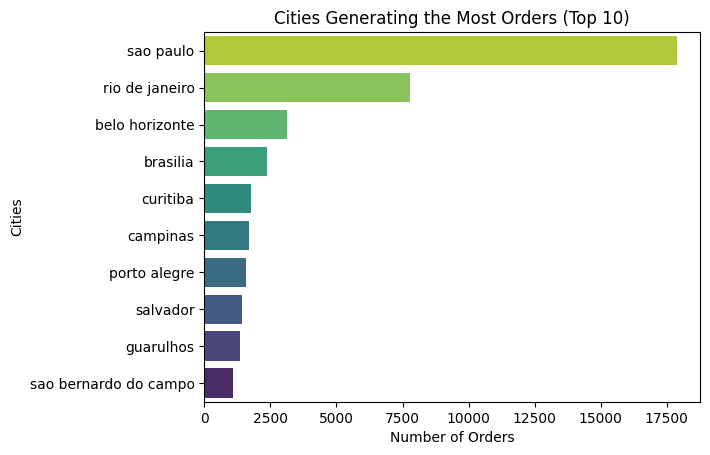

In [97]:
topcities_orders = data.groupby("customer_city")["order_id"].count().reset_index().sort_values("order_id", ascending = False).head(10)
sns.barplot(x = "order_id", y = "customer_city", data = topcities_orders, palette = "viridis_r")

plt.xlabel("Number of Orders")
plt.ylabel("Cities")
plt.title("Cities Generating the Most Orders (Top 10)")
plt.show()

##### 2. Cities generating most revenue

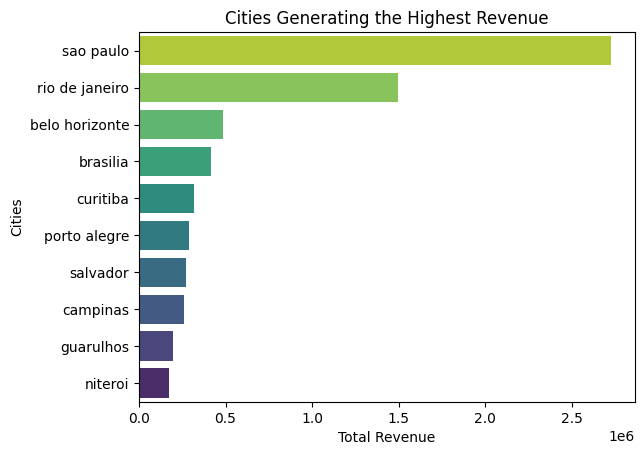

In [98]:
topcities_revenue = data.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending = False).head(10)

sns.barplot(x = "payment_value", y = "customer_city", data = topcities_revenue, palette = 'viridis_r')
plt.xlabel("Total Revenue")
plt.ylabel("Cities")
plt.title("Cities Generating the Highest Revenue")
plt.show()

##### 3. Product Categories with highest & lowest number of orders

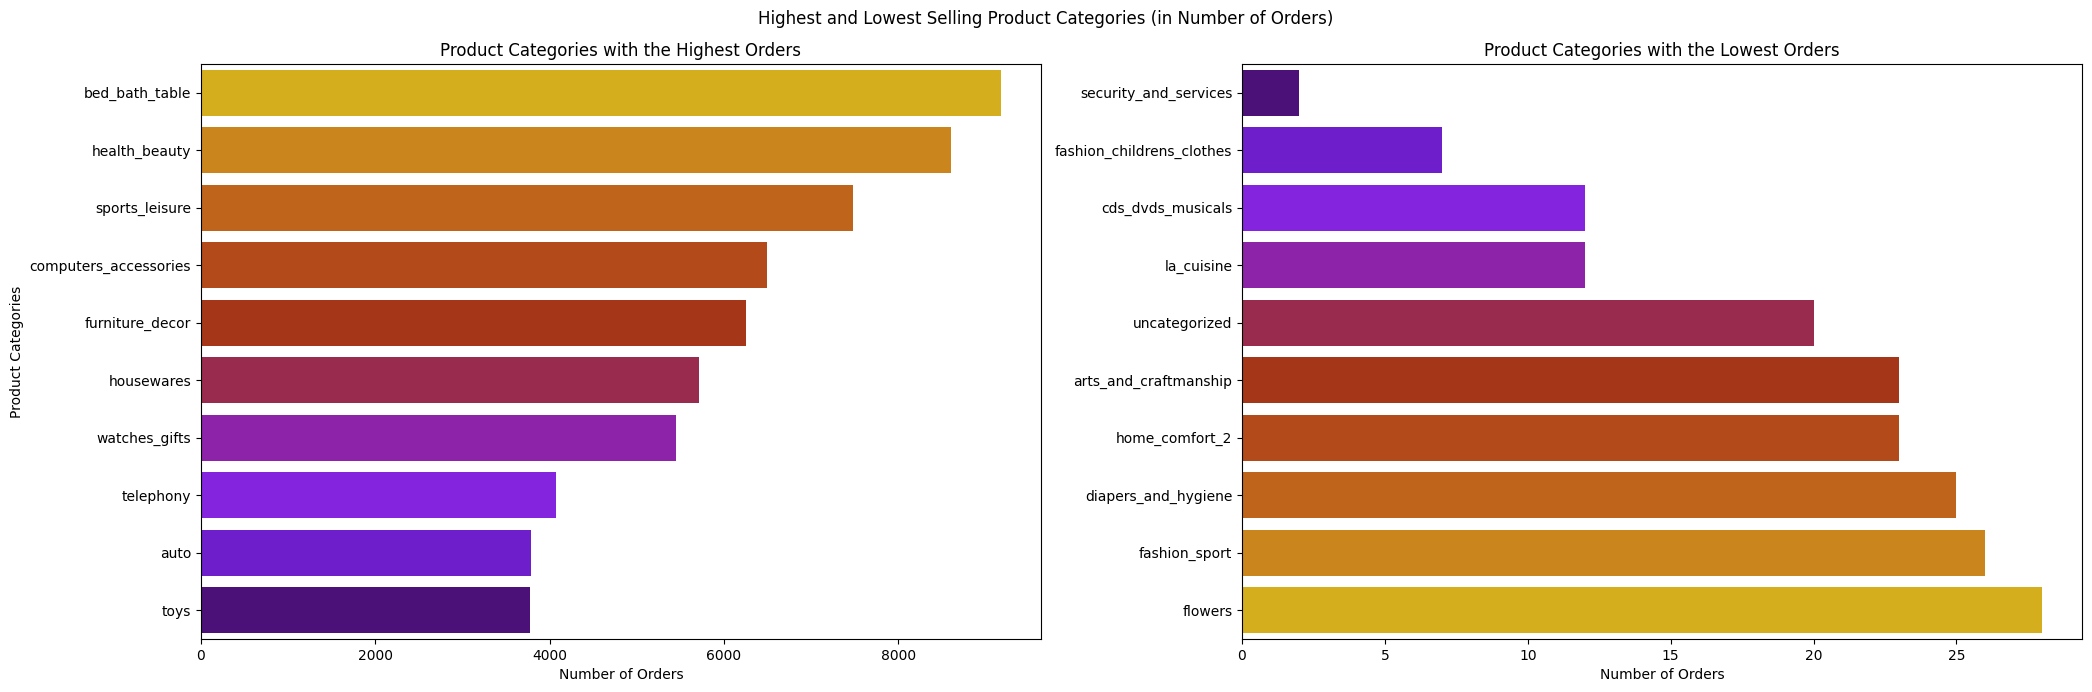

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

# Highest no. of orders
toporders_productcat = data.groupby(data["product_category_name_english"])["order_id"].nunique().reset_index().sort_values("order_id", ascending=False).head(10)

sns.barplot(x = "order_id", y = "product_category_name_english", data = toporders_productcat, palette='gnuplot_r', ax=ax[0])
ax[0].set_xlabel("Number of Orders")
ax[0].set_ylabel("Product Categories")
ax[0].set_title("Product Categories with the Highest Orders")

# Lowest no. of orders
loworders_productcat = data.groupby(data["product_category_name_english"])["order_id"].nunique().reset_index().sort_values("order_id", ascending=True).head(10)

sns.barplot(x = "order_id", y = "product_category_name_english", data = loworders_productcat, palette='gnuplot', ax=ax[1])
ax[1].set_xlabel("Number of Orders")
ax[1].set_ylabel("")
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Product Categories with the Lowest Orders")

# title & adjustments
plt.suptitle("Highest and Lowest Selling Product Categories (in Number of Orders)")
plt.tight_layout(pad=1)
plt.show()

##### 4. Product Categories with highest & lowest revenue generation

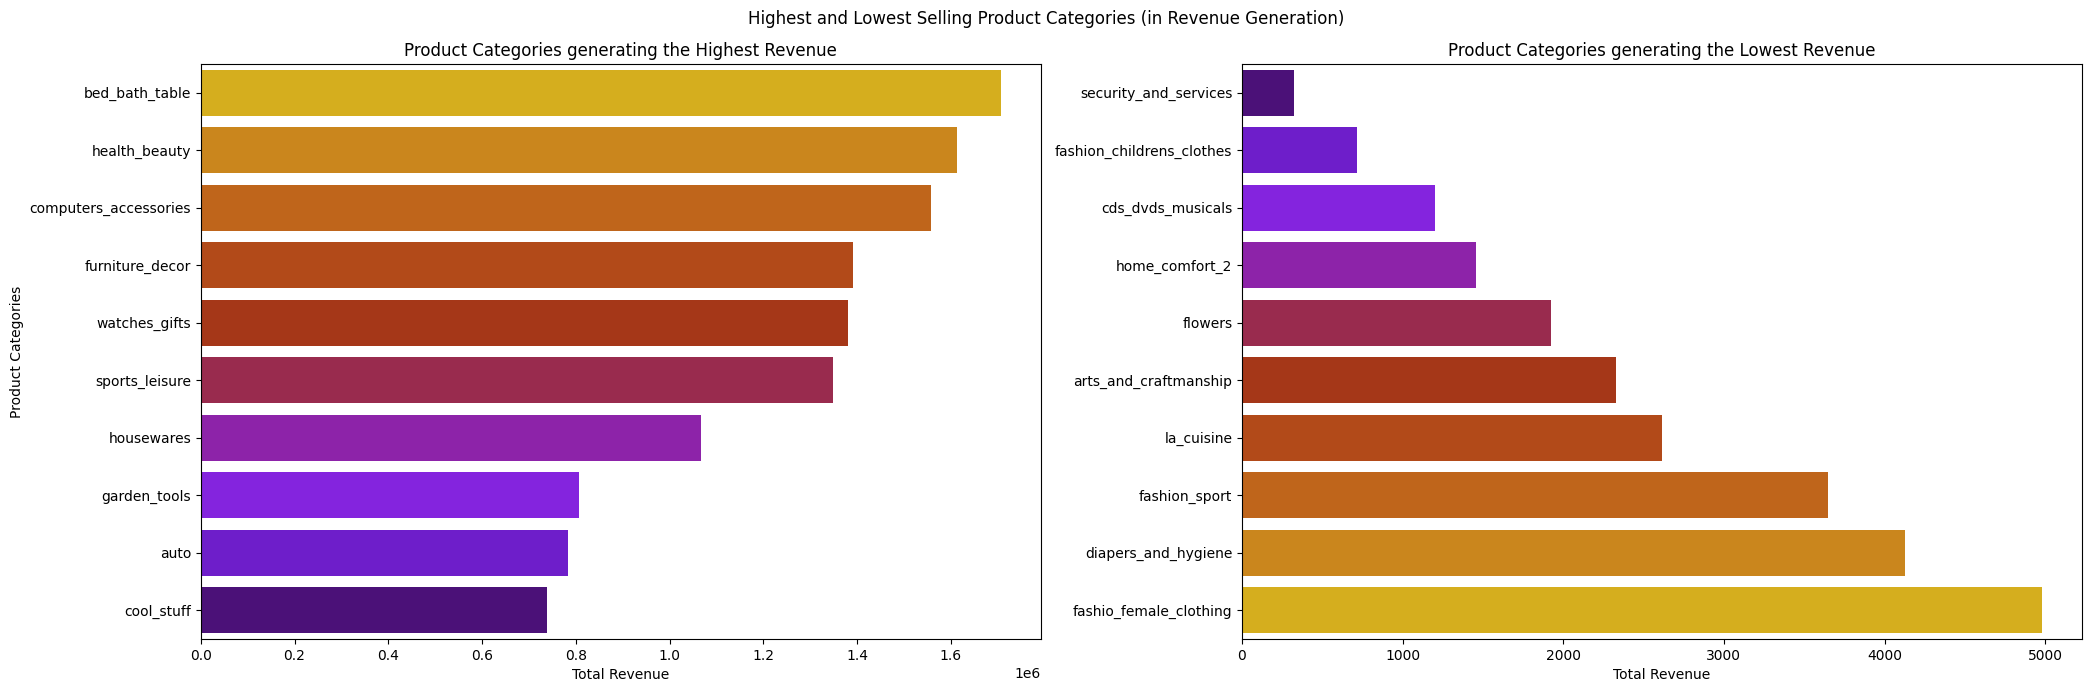

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

# Highest revenue generation
toprevenue_productcat = data.groupby(data["product_category_name_english"])["payment_value"].sum().reset_index().sort_values("payment_value", ascending = False).head(10)

sns.barplot(x = "payment_value", y = "product_category_name_english", data = toprevenue_productcat, palette = 'gnuplot_r', ax = ax[0])
ax[0].set_xlabel("Total Revenue")
ax[0].set_ylabel("Product Categories")
ax[0].set_title("Product Categories generating the Highest Revenue")

# Lowest revenue generation
lowrevenue_productcat = data.groupby(data["product_category_name_english"])["payment_value"].sum().reset_index().sort_values("payment_value", ascending = True).head(10)

sns.barplot(x = "payment_value", y = "product_category_name_english", data = lowrevenue_productcat, palette = 'gnuplot', ax = ax[1])
ax[1].set_xlabel("Total Revenue")
ax[1].set_ylabel("")
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Product Categories generating the Lowest Revenue")

# title & adjustments
plt.suptitle("Highest and Lowest Selling Product Categories (in Revenue Generation)")
plt.tight_layout(pad=1)
plt.show()

##### 5. Frequency of Orders

In [101]:
## Create new columns for date,day,time,month:
data['weekday'] = data['order_purchase_timestamp'].dt.day_name() #day of week in str
data['year'] = data['order_purchase_timestamp'].dt.year #year
data['monthday'] = data['order_purchase_timestamp'].dt.day #day of month
data['weekday'] = data['order_purchase_timestamp'].dt.weekday #day of week as int (0=Monday, 1=Tuesday,...)
data['month'] = data['order_purchase_timestamp'].dt.month #month
data['hour'] = data['order_purchase_timestamp'].dt.hour #hour

In [102]:
day_hour = data.groupby(['weekday','hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()

In [103]:
weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
day_hour.weekday = day_hour.weekday.map(weekmap)
day_hour.head()

,weekday,hour,freq
0,Mon,0,364
1,Mon,1,145
2,Mon,2,73
3,Mon,3,39
4,Mon,4,24


In [104]:
day_hour=day_hour.pivot(index = 'weekday', columns = 'hour', values = 'freq')

Text(0.5, 1.0, 'Heatmap of transactions over the hour by day')

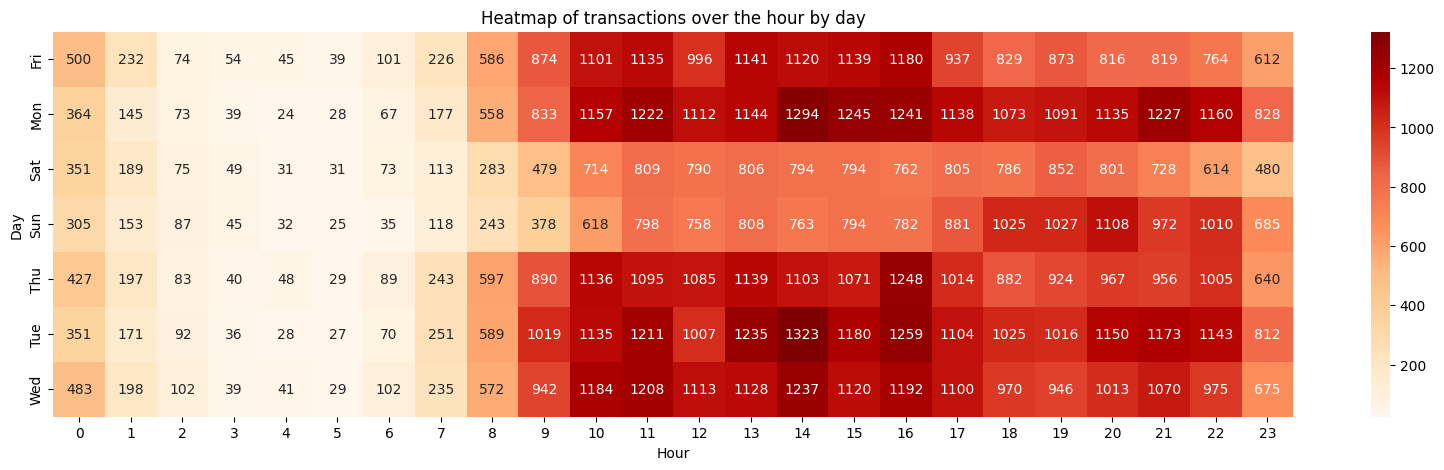

In [105]:
plt.figure(figsize=(20, 5))
ax=sns.heatmap(day_hour, annot = True, fmt = "d", cmap = "OrRd")
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Heatmap of transactions over the hour by day")

##### 6. Distribution of Product Delivery time

In [106]:
#Calculating delivery time for all orders:
deliveryTime = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"])

#Convert the timedeltas to seconds
deliveryTime_Seconds = deliveryTime.apply(lambda x: x.total_seconds())

#Convert seconds to days by dividing by the number of seconds in a day (86400 seconds per day)
data['deliveryTime_Days'] = round(deliveryTime_Seconds/86400, 2)

#Summarizing the delivery time:
data['deliveryTime_Days'].describe()

count    113216.000000
mean         12.440908
std           9.355297
min           0.530000
25%           6.740000
50%          10.190000
75%          15.500000
max         208.350000
Name: deliveryTime_Days, dtype: float64

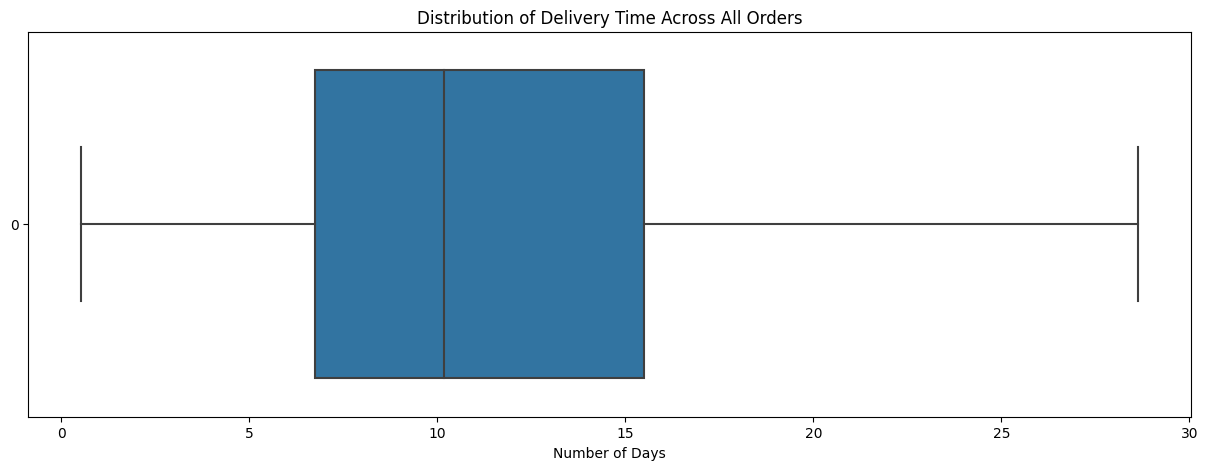

In [107]:
plt.figure(figsize = (15, 5))

sns.boxplot(data.deliveryTime_Days, orient = 'h', showfliers = False)
plt.xlabel("Number of Days")
plt.title('Distribution of Delivery Time Across All Orders')
plt.show()

The avg. delivery time ranges from 7 to 16 days.

##### 7. Effect of Delivery Time on Review Scores

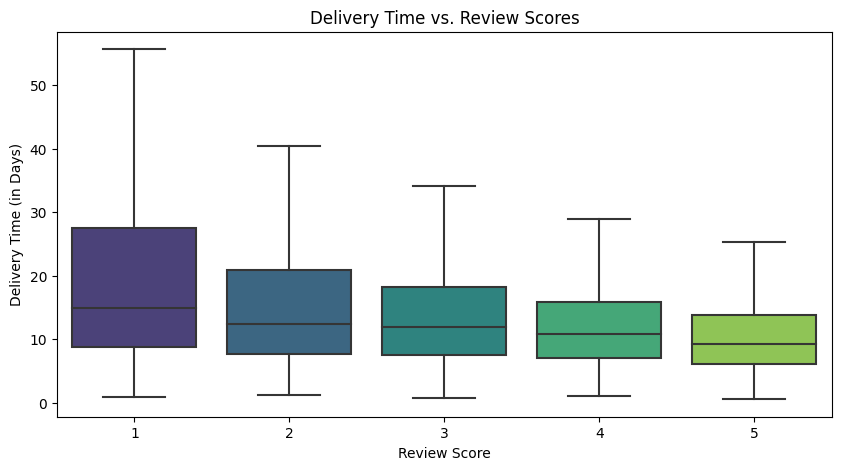

In [108]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "review_score", y = "deliveryTime_Days", data = data, showfliers = False, palette = 'viridis')
plt.xlabel("Review Score")
plt.ylabel("Delivery Time (in Days)")
plt.title("Delivery Time vs. Review Scores")
plt.show()

with increase in delivery time, review scores tend to decrease.

##### 8. Best & Worst performing Product Categories acc. to Review Scores

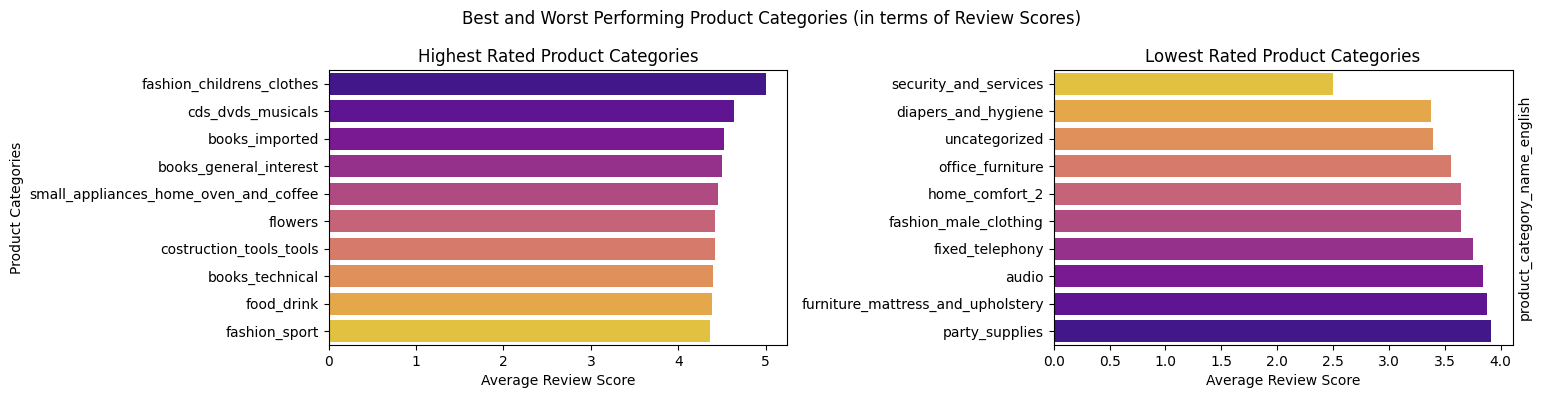

In [109]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 4))

prodCat_TopReview = data.groupby(data["product_category_name_english"])["review_score"].mean().reset_index().sort_values("review_score", ascending = False).head(10)
sns.barplot(x = "review_score", y = "product_category_name_english", data = prodCat_TopReview, palette = 'plasma', ax = ax[0])
ax[0].set_xlabel("Average Review Score")
ax[0].set_ylabel("Product Categories")
ax[0].set_title("Highest Rated Product Categories")

prodCat_BotReview = data.groupby(data["product_category_name_english"])["review_score"].mean().reset_index().sort_values("review_score", ascending = True).head(10)
sns.barplot(x = "review_score", y = "product_category_name_english", data = prodCat_BotReview, palette = 'plasma_r', ax = ax[1])
ax[1].set_xlabel("Average Review Score")
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Lowest Rated Product Categories")

plt.suptitle("Best and Worst Performing Product Categories (in terms of Review Scores)")
plt.tight_layout(pad = 1)
plt.show()

### RFM Analysis 

RFM analysis is a marketing technique that segments customers based on their recency, frequency, and monetary value of transactions.

- **Recency:** Measures how recently a customer made a purchase.
- **Frequency:** Analyzes how often a customer makes purchases.
- **Monetary Value:** Evaluates the total monetary value of a customer's transactions.

##### 1. Recency

In [110]:
#Grouping the data by Customer Unique ID to find the latest order of each customer:
df_recency = data.groupby(by = 'customer_unique_id', as_index = False)['order_purchase_timestamp'].max()

#Renaming the column:
df_recency.rename(columns = {"order_purchase_timestamp": "LastPurchaseDate"}, inplace = True)

#Removing time and extracting only date from the datetime field:
df_recency["LastPurchaseDate"] = df_recency["LastPurchaseDate"].dt.date

#Using the last order in the entire dataset as a reference point to calculate recency:
recent_date = data['order_purchase_timestamp'].dt.date.max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

df_recency.head()

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,114
2,0000f46a3911fa3c0805444483337064,2017-03-10,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,288


##### 2. Frequency

In [111]:
#Grouping the data by Customer Unique ID to calculate the number of unique Order IDs for every customer.
frequency_df = data.groupby(["customer_unique_id"]).agg({"order_id": "nunique"}).reset_index()

#Renaming the column:
frequency_df.rename(columns = {"order_id": "Frequency"}, inplace = True)

frequency_df.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


##### 3. Monetary

In [112]:
#Grouping the data by Customer Unique ID to calulcate the total spending of every customer.
monetary_df = data.groupby('customer_unique_id', as_index = False)['payment_value'].sum()

#Renaming the column:
monetary_df.rename(columns = {"payment_value": "Monetary"}, inplace = True)

monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


#### merging R-F-M metrics

In [113]:
rfm = df_recency.merge(frequency_df, on = 'customer_unique_id') \
                .merge(monetary_df, on = 'customer_unique_id')

#Dropping the 'Last Purchase Date' column:
rfm.drop('LastPurchaseDate', axis = 1, inplace = True)

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
